# Price Elasticity

Recall:

$$
\begin{aligned}
Q &= dP^{-c} \\
&\rightarrow \\
dQ &= -c \log(P) + \log(d)
\end{aligned}
$$

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [58]:
# price elasticity function

def demand(P, constant, coef):
    """Q = dP^{-c}"""
    return constant * P**(-coef)

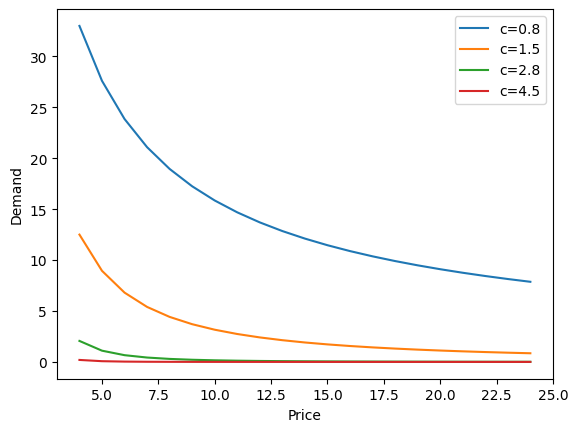

In [116]:
P = np.arange(4, 25)

d = 100

Q1 = demand(P, d, 0.8)
Q2 = demand(P, d, 1.5)
Q3 = demand(P, d, 2.8)
Q4 = demand(P, d, 4.5)

plt.plot(P, Q1, label='c=0.8')
plt.plot(P, Q2, label='c=1.5')
plt.plot(P, Q3, label='c=2.8')
plt.plot(P, Q4, label='c=4.5')
plt.ylabel("Demand")
plt.xlabel("Price")
plt.legend();

Same but in log scale:

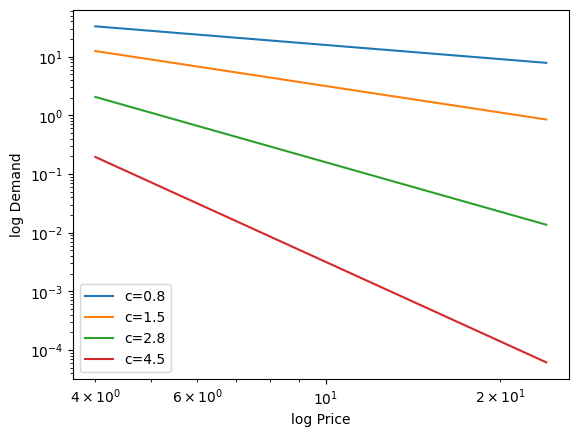

In [118]:
plt.plot(P, Q1, label='c=0.8')
plt.plot(P, Q2, label='c=1.5')
plt.plot(P, Q3, label='c=2.8')
plt.plot(P, Q4, label='c=4.5')
plt.ylabel("log Demand")
plt.xlabel("log Price")
plt.yscale('log')
plt.xscale('log')
plt.legend();

In visualizing it we see that we can simply run a log log regression on this to recover the elasticity coefficient.

In [124]:
import statsmodels.api as sm

exog = sm.add_constant(np.log(P))
endog = np.log(Q1)

mod = sm.OLS(endog, exog).fit()
mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 8.200e+29
Date:                Tue, 19 Dec 2023   Prob (F-statistic):          1.67e-273
Time:                        16:07:08   Log-Likelihood:                 681.26
No. Observations:                  21   AIC:                            -1359.
Df Residuals:                      19   BIC:                            -1356.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.6052   2.27e-15   2.02e+15      0.000       4.605       4.605
x1            -0.8000   8.83e-16  -9.06e+14      0.000      -0.800      -0.800
==============================================================================
Omnibus:                        1.471   Durbin-Watson:                   0.024
Prob(Omnibus):                  0.479   Jarque-Bera (JB):                1.188
Skew:                           0.392   Prob(JB):                        0.552
Kurtosis:                       2.138   Cond. No.                         14.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

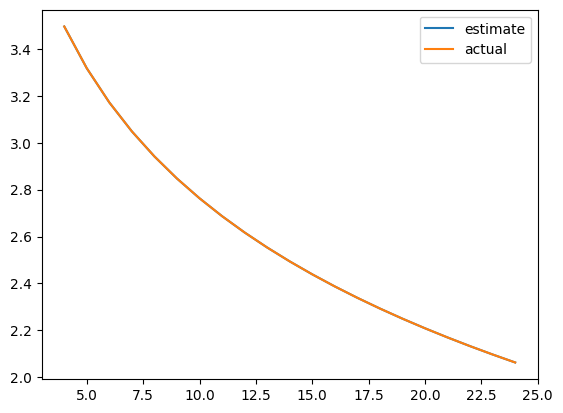

In [132]:
plt.plot(P, mod.predict(sm.add_constant(np.log(P))), label='estimate')
plt.plot(P, np.log(Q1), label='actual')
plt.legend()

The way we interpret this elasticity coefficient is that a 1% increase in price is associated with a $-c$% decrease in demand (approximately). 

In [114]:
def loglogcoef(x, beta):
    """
    'An x percent increase in the predictor is associated with a beta% change in the average outcome'
    is an approximation, this returns the true change in a log-log linear model
    """
    return np.e**(np.log((100 + x)/100)) * beta

loglogcoef(1,-1.2)

-1.212

In [ ]:
# Now, it's not so simple - elasticity is not constant.